# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Falah Asyraf
- **Email:** falah.reaggea@gmail.com
- **ID Dicoding:** falaaah

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sewa sepeda pada tahun 2012? Apakah hari biasa (weekday) dan libur (holiday) mempengaruhi faktor penggunaan sewa sepeda?
- Bagaimana jam kerja (7–9 pagi dan 5–8 malam) memengaruhi penyewaan sepeda pada hari kerja (workingday)?

## Import Semua Packages/Library yang Digunakan

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [206]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

#### Menampilkan 5 bari pertama

In [207]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [208]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day.csv dapat digunakan
- Data hour.csv dapat digunakan

### Assessing Data

#### Menilai Data day.csv

In [209]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [210]:
print("Data yang null pada day.csv adalah" + "\n" + str(day_df.isnull().sum()))

Data yang null pada day.csv adalah
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [211]:
print ("Jumlah data terduplkasi pada day.csv adalah " + str(day_df.duplicated().sum()))

Jumlah data terduplkasi pada day.csv adalah 0


In [212]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour.csv

In [214]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [215]:
print("Data yang null pada hour.csv adalah" + "\n" + str(hour_df.isnull().sum()))

Data yang null pada hour.csv adalah
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [216]:
print ("Jumlah data terduplikat pada hour.csv adalah " + str(hour_df.duplicated().sum()))

Jumlah data terduplikat pada hour.csv adalah 0


In [217]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada proses data wrangling untuk dataset day.csv, tidak ditemukan adanya nilai Null atau nilai yang kosong, yang menunjukkan bahwa dataset ini bersih dan siap untuk dianalisis tanpa memerlukan proses imputasi atau pengisian data yang hilang. Selain itu, tidak ditemukan data yang Duplicated atau duplikasi, sehingga seluruh baris data dalam dataset ini unik dan tidak perlu dilakukan penghapusan duplikasi.
- Pada proses data wrangling untuk dataset hour.csv, hasil pemeriksaan menunjukkan bahwa dataset ini juga tidak mengandung nilai Null, sehingga semua kolom memiliki data yang lengkap untuk setiap rekaman. Tidak ada data yang Duplicated, yang memastikan integritas dan keunikan setiap baris data dalam dataset ini, sehingga analisis dapat dilakukan dengan lebih akurat tanpa perlu membersihkan data tambahan.

### Cleaning Data

##### Mengkonversi Tipe Data (Day.csv)

In [219]:
# Konversi tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

In [220]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

##### Mengganti Nama Musim (Day.csv)

In [221]:
day_df['season'] = day_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

In [222]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Menghapus Kolom Tidak Terpakai (Day.csv)

In [223]:
day_df.drop(columns=['instant', 'temp', 'atemp', 'windspeed', 'hum'], inplace=True)

In [224]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,spring,0,1,0,6,0,2,331,654,985
1,2011-01-02,spring,0,1,0,0,0,2,131,670,801
2,2011-01-03,spring,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,spring,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,spring,0,1,0,3,1,1,82,1518,1600


##### Merubah Nama Kolom agar Mudah Dipahami (Day.csv)

In [225]:
day_df = day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_rentals',
    'weathersit': 'weather_condition',
})

In [226]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weather_condition,casual,registered,total_rentals
0,2011-01-01,spring,0,1,0,6,0,2,331,654,985
1,2011-01-02,spring,0,1,0,0,0,2,131,670,801
2,2011-01-03,spring,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,spring,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,spring,0,1,0,3,1,1,82,1518,1600


In [227]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   casual             731 non-null    int64         
 9   registered         731 non-null    int64         
 10  total_rentals      731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB


##### Mengkonversi Tipe Data (Hour.csv)

In [228]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [229]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['hr'] = hour_df['hr'].astype('int')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [230]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### Mengganti Nama Musim (Hour.csv)

In [231]:
hour_df['season'] = hour_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

In [232]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Menghapus Kolom yang Tidak Terpakai (Hour.csv)

In [233]:
hour_df.drop(columns=['instant', 'temp', 'atemp', 'windspeed', 'hum'], inplace=True)

In [234]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,spring,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,spring,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,spring,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,spring,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,spring,0,1,4,0,6,0,1,0,1,1


##### Merubah Nama Kolom agar Mudah Dipahami (Hour.csv)

In [235]:
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'total_rentals',
    'weathersit': 'weather_condition',
})

In [236]:
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,casual,registered,total_rentals
0,2011-01-01,spring,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,spring,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,spring,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,spring,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,spring,0,1,4,0,6,0,1,0,1,1


**Insight:**
- Proses pembersihan data berhasil dilakukan dengan menghapus kolom-kolom yang tidak relevan atau tidak digunakan dalam analisis pada dataset Day.csv, sehingga dataset menjadi lebih ringkas dan fokus terhadap kolom yang diperlukan untuk analisis. Selain itu, nama-nama kolom pada dataset telah diubah menjadi lebih deskriptif dan mudah dipahami untuk mempermudah interpretasi data oleh pembaca atau analis.
- Proses yang sama juga berhasil diterapkan pada dataset Hour.csv, yaitu dengan menghapus kolom yang tidak diperlukan untuk analisis lebih lanjut. Nama-nama kolom pada dataset ini juga telah disesuaikan agar lebih jelas dan dapat memberikan informasi yang lebih mudah dipahami oleh pengguna dataset.

## Exploratory Data Analysis (EDA)

### Explore day.csv

##### Memfilter Data hanya untuk tahun 2012

In [237]:
year_day = day_df[day_df['year'] == 1]
year_day

,date,season,year,month,holiday,weekday,workingday,weather_condition,casual,registered,total_rentals
365,2012-01-01,spring,1,1,0,0,0,1,686,1608,2294
366,2012-01-02,spring,1,1,1,1,0,1,244,1707,1951
367,2012-01-03,spring,1,1,0,2,1,1,89,2147,2236
368,2012-01-04,spring,1,1,0,3,1,2,95,2273,2368
369,2012-01-05,spring,1,1,0,4,1,1,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,spring,1,12,0,4,1,2,247,1867,2114
727,2012-12-28,spring,1,12,0,5,1,2,644,2451,3095
728,2012-12-29,spring,1,12,0,6,0,2,159,1182,1341
729,2012-12-30,spring,1,12,0,0,0,1,364,1432,1796


##### Menghitung rata-rata pengguna sepeda per bulan pada tahun 2012

In [238]:
montly_avg = year_day.groupby('month')['total_rentals'].mean()
print("Rata-rata pengguna sepeda per bulan adalah" + "\n" + str(montly_avg))

Rata-rata pengguna sepeda per bulan adalah
month
1     3120.774194
2     3556.448276
3     5318.548387
4     5807.466667
5     6318.225806
6     6761.000000
7     6567.967742
8     6919.451613
9     7285.766667
10    6414.225806
11    5088.800000
12    3990.741935
Name: total_rentals, dtype: float64


/var/folders/ql/v6pp8pg54j79r582f2mlzvww0000gn/T/ipykernel_9498/1682228869.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  montly_avg = year_day.groupby('month')['total_rentals'].mean()


##### Mengitung tahu pengguna sepeda per hari dalam seminggu atau weekday pada tahun 2012

In [239]:
weekday_avg = year_day.groupby('weekday')['total_rentals'].mean()
print("Rata-rata pengguna sepeda per hari adalah" + "\n" + str(weekday_avg))

Rata-rata pengguna sepeda per hari adalah
weekday
0    5036.849057
1    5194.000000
2    5553.288462
3    5843.826923
4    5977.750000
5    5880.461538
6    5732.000000
Name: total_rentals, dtype: float64


/var/folders/ql/v6pp8pg54j79r582f2mlzvww0000gn/T/ipykernel_9498/2183549802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = year_day.groupby('weekday')['total_rentals'].mean()


##### Menghitung rata-rata pengguna sepeda per hari libur atau holiday pada tahun 2012

In [240]:
holiday_avg = year_day.groupby('holiday')['total_rentals'].mean()
print("Rata-rata pengguna sepeda per hari libur adalah" + "\n" + str(holiday_avg))

Rata-rata pengguna sepeda per hari libur adalah
holiday
0    5637.078873
1    4401.181818
Name: total_rentals, dtype: float64


/var/folders/ql/v6pp8pg54j79r582f2mlzvww0000gn/T/ipykernel_9498/3707370870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_avg = year_day.groupby('holiday')['total_rentals'].mean()


##### Menghitung rata-rata pengguna sepeda per hari kerja

In [241]:
workingday_avg = year_day.groupby('workingday')['total_rentals'].mean()
print("Rata-rata pengguna sepeda per hari kerja adalah" + "\n" + str(workingday_avg))

Rata-rata pengguna sepeda per hari kerja adalah
workingday
0    5288.189655
1    5744.584000
Name: total_rentals, dtype: float64


/var/folders/ql/v6pp8pg54j79r582f2mlzvww0000gn/T/ipykernel_9498/2194837709.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_avg = year_day.groupby('workingday')['total_rentals'].mean()


##### Mengelompokkan Perhitungan rata-rata dari weekday, workingday, dan holiday

In [242]:
year_day_copy = year_day.copy()
year_day_copy['day_type'] = year_day.apply(
    lambda row: 'Holiday' if row['holiday'] == 1 else 
                ('Weekend' if row['weekday'] in [0, 6] else 'Working Day'), axis=1
)

In [243]:
day_type_avg = year_day_copy.groupby('day_type')['total_rentals'].mean()
print("Rata-rata pengguna sepeda berdasarkan jenis hari:")
print(day_type_avg)

Rata-rata pengguna sepeda berdasarkan jenis hari:
day_type
Holiday        4401.181818
Weekend        5381.114286
Working Day    5744.584000
Name: total_rentals, dtype: float64


#### Explore hour.csv

##### Menghitung Pengguna Sepeda Pada Working Day

In [244]:
workingday_data = hour_df[hour_df['workingday'] == 1]
print("Jumlah pengguna sepeda pada hari kerja: " + str(sum(workingday_data['total_rentals'])))

Jumlah pengguna sepeda pada hari kerja: 2292410


##### Menghitung Pengguna Sepeda pada Jam Kerja di Hari Kerja

In [246]:
workingday_peak = workingday_data[
    (workingday_data['hour'].between(7, 9)) | (workingday_data['hour'].between(17, 20))
]
print("Jumlah pengguna sepeda pada jam sibuk hari kerja: " + str(sum(workingday_peak['total_rentals'])))

Jumlah pengguna sepeda pada jam sibuk hari kerja: 1305645


##### Menghitung Rata-rata Pengguna Sepeda pada Jam Sibuk (Peak Hour)

In [248]:
workingday_peak_avg = workingday_peak.groupby('hour')['total_rentals'].mean()
print("Rata-rata pengguna sepeda pada jam sibuk hari kerja:")
print(workingday_peak_avg)

Rata-rata pengguna sepeda pada jam sibuk hari kerja:
hour
7     290.612903
8     477.006048
9     241.518145
17    525.290581
18    492.226908
19    348.401606
20    249.718876
Name: total_rentals, dtype: float64


##### Menghitung Jumlah Pengguna Sepeda pada Jam Tidak Sibuk Hari Kerja (Peak-Hour)

In [249]:
workingday_non_peak = workingday_data[
    ~(workingday_data['hour'].between(7, 9)) & ~(workingday_data['hour'].between(17, 20))
]
print("Jumlah pengguna sepeda pada jam tidak sibuk hari kerja: " + str(sum(workingday_non_peak['total_rentals'])))

Jumlah pengguna sepeda pada jam tidak sibuk hari kerja: 986765


##### Menghitung Rata-rata Pengguna Sepeda pada Jam Tidak Sibuk di Hari Kerja (Non-peak Hour)

In [250]:
workingday_non_peak_avg = workingday_non_peak.groupby('hour')['total_rentals'].mean()
print("Rata-rata pengguna sepeda pada jam tidak sibuk hari kerja:")
print(workingday_non_peak_avg)

Rata-rata pengguna sepeda pada jam tidak sibuk hari kerja:
hour
0      36.786290
1      16.552632
2       8.683778
3       4.942553
4       5.429787
5      24.913131
6     102.500000
10    135.366935
11    158.229839
12    200.820926
13    198.429719
14    183.572289
15    201.331325
16    293.122244
21    186.287149
22    138.389558
23     88.708835
Name: total_rentals, dtype: float64


**Insight:**
- Rata-rata penggunaan sepeda pada hari libur (Holiday) adalah 4401.18, yang lebih rendah dibandingkan jenis hari lainnya, menunjukkan bahwa aktivitas pengguna lebih santai. Pada akhir pekan (Weekend), permintaan meningkat menjadi 5381.11, kemungkinan besar karena aktivitas rekreasi. Sementara itu, pada hari kerja (Working Day), rata-rata penggunaan sepeda mencapai 5744.58, yang merupakan permintaan tertinggi, mengindikasikan bahwa sepeda sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah.
- Pada hari kerja, penggunaan sepeda mencapai total 2,292,410 dengan lebih dari separuhnya terjadi pada jam sibuk (07:00–09:00 dan 17:00–20:00) sebanyak 1,305,645. Puncak tertinggi terlihat pada pukul 08:00 dan 17:00, masing-masing dengan rata-rata pengguna 477 dan 525.29 per jam, menunjukkan hubungan erat dengan aktivitas perjalanan kerja. Di luar jam sibuk, total penggunaan sepeda lebih rendah, yaitu 986,765, dengan peningkatan kecil di sekitar jam makan siang. Hal ini mengindikasikan bahwa sepeda terutama digunakan untuk aktivitas rutin di pagi dan sore hari pada hari kerja, sedangkan penggunaan di luar jam sibuk lebih sporadis dan kemungkinan untuk keperluan rekreasi atau non-rutin.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

##### Visualisasi Rata-rata Penggunaan Sepeda Berdasarkan Jenis Hari

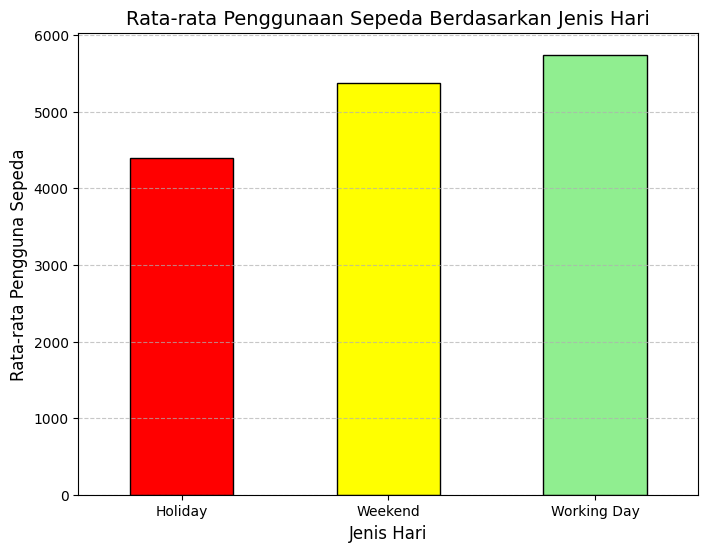

In [251]:
# Visualisasi rata-rata penggunaan sepeda berdasarkan jenis hari
plt.figure(figsize=(8, 6))
day_type_avg.plot(kind='bar', color=['red', 'yellow', 'lightgreen'], edgecolor='black')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jenis Hari', fontsize=14)
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Visualisasi Rata-rata Penggunaan Sepeda per Bulan (2012)

/var/folders/ql/v6pp8pg54j79r582f2mlzvww0000gn/T/ipykernel_9498/2819030138.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = year_day.groupby('month')['total_rentals'].mean()


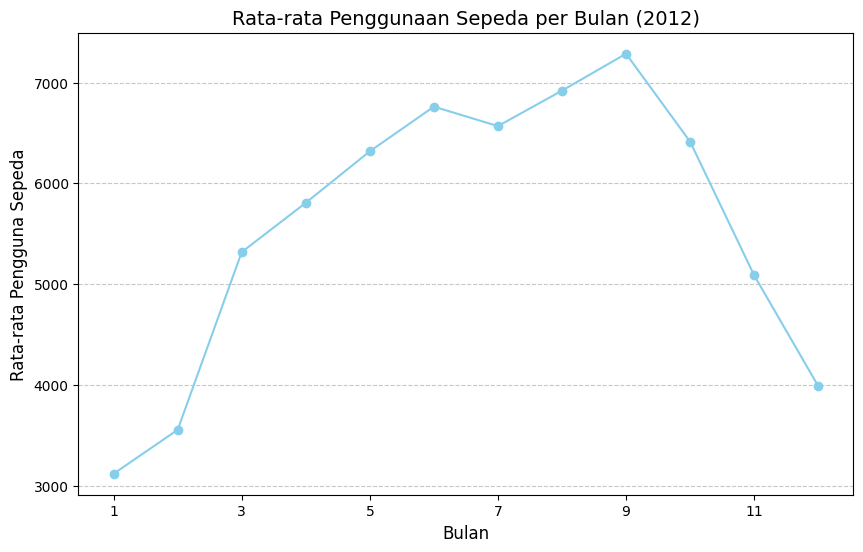

In [252]:
# Hitung rata-rata penggunaan sepeda per bulan
monthly_avg = year_day.groupby('month')['total_rentals'].mean()

# Visualisasi rata-rata penggunaan sepeda per bulan
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='skyblue')
plt.title('Rata-rata Penggunaan Sepeda per Bulan (2012)', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Visualisasi Penggunaan Sepeda per Hari dalam Seminggu

/var/folders/ql/v6pp8pg54j79r582f2mlzvww0000gn/T/ipykernel_9498/2356438126.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = year_day.groupby('weekday')['total_rentals'].mean()


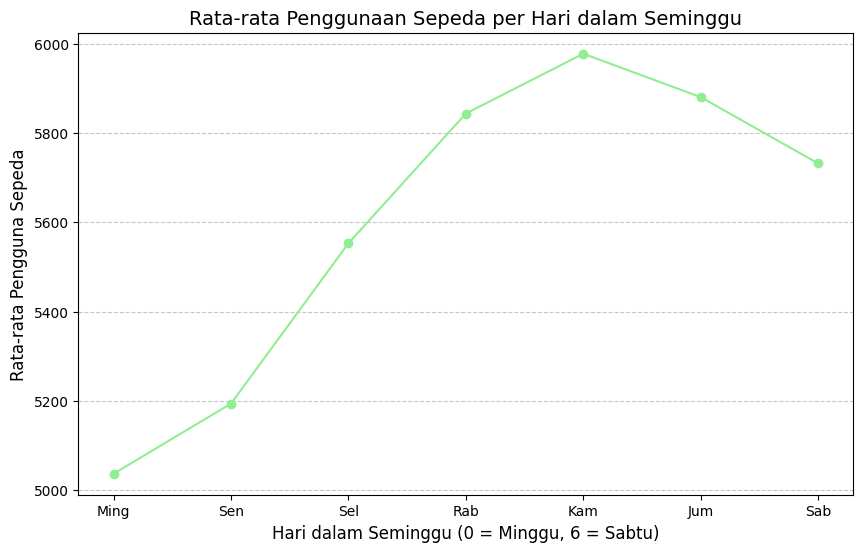

In [253]:
# Hitung rata-rata pengguna sepeda per hari dalam seminggu
weekday_avg = year_day.groupby('weekday')['total_rentals'].mean()

# Visualisasi rata-rata penggunaan sepeda per hari dalam seminggu
plt.figure(figsize=(10, 6))
weekday_avg.plot(kind='line', marker='o', color='lightgreen')
plt.title('Rata-rata Penggunaan Sepeda per Hari dalam Seminggu', fontsize=14)
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(ticks=range(7), labels=['Ming', 'Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Pertanyaan 2:

##### Visualisasi Perbandingan Penyewaan Sepeda pada Jam Kerja vs Non-Kerja

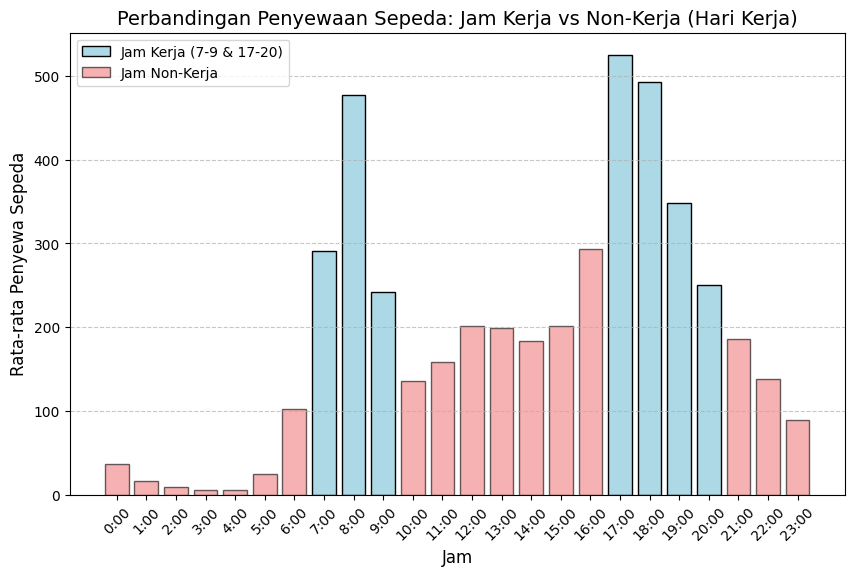

In [254]:
plt.figure(figsize=(10, 6))
plt.bar(workingday_peak_avg.index, workingday_peak_avg, color='lightblue', label='Jam Kerja (7-9 & 17-20)', edgecolor='black')
plt.bar(workingday_non_peak_avg.index, workingday_non_peak_avg, color='lightcoral', alpha=0.6, label='Jam Non-Kerja', edgecolor='black')
plt.title('Perbandingan Penyewaan Sepeda: Jam Kerja vs Non-Kerja (Hari Kerja)', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewa Sepeda', fontsize=12)
plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Insight:**
- Pada analisis pertama, ditemukan bahwa penggunaan sepeda tertinggi terjadi pada bulan September (9), dengan intensitas penggunaan harian yang lebih banyak pada hari Kamis dan juga pada hari kerja (working day).
- Visualisasi terhadap data jam menunjukkan bahwa penyewaan sepeda lebih tinggi selama jam kerja dibandingkan dengan jam non-kerja pada hari kerja, yang mengindikasikan aktivitas rutin seperti perjalanan ke tempat kerja atau sekolah sebagai faktor utama penggunaan sepeda.

## Conclusion

- Berdasarkan analisis data day.csv, penggunaan sepeda tertinggi terjadi pada tahun 2012 pada bulan September, menunjukkan bahwa bulan ini kemungkinan memiliki kondisi yang mendukung aktivitas bersepeda, seperti cuaca yang baik. Selain itu, hari kerja (working day) cenderung memiliki rata-rata penyewaan sepeda lebih tinggi dibandingkan dengan hari libur dan akhir pekan. Hal ini menunjukkan bahwa sepeda sering digunakan untuk aktivitas rutin seperti perjalanan ke tempat kerja atau sekolah.
- Dari analisis data hour.csv, jam sibuk (pagi pukul 7-9 dan sore pukul 17-20) memiliki jumlah penyewaan sepeda yang jauh lebih tinggi dibandingkan dengan jam non-sibuk pada hari kerja. Hal ini mengindikasikan bahwa sepeda digunakan sebagai alat transportasi utama selama jam-jam perjalanan kerja. Pola ini jelas terlihat pada hari kerja, sedangkan pada hari libur penggunaan sepeda lebih merata sepanjang hari.